In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('flights.csv')

df.columns



Index(['flight', 'time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'speed', 'payload', 'altitude', 'date',
       'time_day', 'route'],
      dtype='object')

In [3]:
df['power'] = df['battery_voltage'] * df['battery_current']
df = df.loc[(df['flight'] == 1)]
df

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,power
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5,2.118702
1,1,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5,2.311789
2,1,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5,2.311669
3,1,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5,2.311550
4,1,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5,1.925196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1,200.12,0.5,106.0,23.061522,0.135180,-79.782348,40.458035,268.296291,-0.000503,...,0.232549,0.733589,-9.772775,4.0,0.0,25,2019-04-07,10:13,R5,3.117460
1335,1,200.30,0.5,104.0,23.070286,0.135180,-79.782348,40.458034,268.307138,-0.000486,...,0.230562,0.743619,-9.772132,4.0,0.0,25,2019-04-07,10:13,R5,3.118645
1336,1,200.40,0.5,99.0,23.067781,0.143132,-79.782348,40.458034,268.310919,-0.000496,...,0.234810,0.736684,-9.774733,4.0,0.0,25,2019-04-07,10:13,R5,3.301736
1337,1,200.60,0.5,103.0,23.059017,0.119277,-79.782348,40.458034,268.324848,-0.000478,...,0.232103,0.732756,-9.772891,4.0,0.0,25,2019-04-07,10:13,R5,2.750401


## Support Vector Machine

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df.columns

Index(['flight', 'time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'speed', 'payload', 'altitude', 'date',
       'time_day', 'route', 'power'],
      dtype='object')

In [33]:

velocity_y = df.drop(['velocity_y', 'date', 'altitude', 'time_day', 'route', 'flight', 'time', 'altitude'], axis=1)
Y = df['velocity_y']
velocity_y_train, velocity_y_test, Y_train, Y_test = train_test_split(velocity_y, Y, test_size=0.33)



In [34]:
clf = SVC(kernel='linear')
clf.fit(velocity_y_train, Y_train.astype('int'))

SVC(kernel='linear')

In [35]:
Y_pred = clf.predict(velocity_y_test)

In [36]:
print(classification_report(Y_test.astype('int'), Y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.44      0.53         9
           0       0.95      0.95      0.95       165
           1       0.54      0.64      0.58        11
           2       0.69      0.53      0.60        17
           3       0.92      0.98      0.95       215
           4       0.79      0.44      0.56        25

    accuracy                           0.90       442
   macro avg       0.76      0.66      0.70       442
weighted avg       0.90      0.90      0.90       442



## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
x = df[['velocity_y', 'linear_acceleration_y']]
ws = df['wind_speed']

In [39]:
model = LinearRegression()
x_train, x_test, ws_train, ws_test = train_test_split(x, ws, test_size =0.33)

model.fit(x_train, ws_train)

LinearRegression()

In [40]:
predictions = model.predict(x_test)
residuals = predictions - ws_test

residuals

1189   -1.181038
87      1.014176
46      0.813889
406     1.382709
1081   -2.332779
          ...   
165    -0.691429
1230    0.096303
277     0.622808
1288    1.371449
1272    1.077109
Name: wind_speed, Length: 442, dtype: float64

(array([ 12.,  11.,  46.,  54., 102.,  65.,  37.,  38.,  61.,  16.]),
 array([-2.66707608, -2.17758567, -1.68809525, -1.19860484, -0.70911443,
        -0.21962401,  0.2698664 ,  0.75935682,  1.24884723,  1.73833764,
         2.22782806]),
 <BarContainer object of 10 artists>)

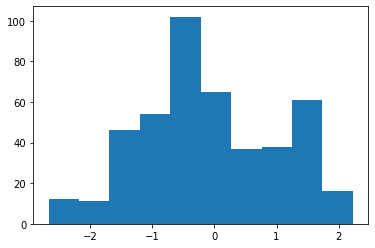

In [41]:
plt.hist(residuals)

In [42]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(ws_test, predictions)**0.05
error

1.0062721091637554